# Kerasによる多重パーセプトロン
アメリカNISTによる手書きの数字集（MNIST)

### データセットの標本情報

In [1]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [2]:
train_images.shape,test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
train_labels,test_labels

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

### 画像イメージ

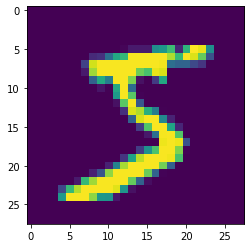

In [4]:
import matplotlib.pyplot as plt

img = train_images[0]

plt.imshow(img)
plt.show()

## 入力データの一次元化

In [5]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
train_images.shape

(60000, 784)

In [6]:
test_images =test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

### ラベルのone-hotエンコーディング処理

In [7]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [8]:
train_labels.shape

(60000, 10)

# モデル構築
ここではpython のkerasというライブラリを用いる事例でパーセプトロンの構築について復習する。

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

### 多重パーセプトロン

In [10]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=28*28))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

### 学習

In [13]:
history = model.fit(train_images,train_labels,
                    epochs=10,
                    batch_size=128,
                   validation_data=(test_images,test_labels))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 1.2339 - accuracy: 0.7119 - val_loss: 0.6588 - val_accuracy: 0.8541
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.5627 - accuracy: 0.8651 - val_loss: 0.4620 - val_accuracy: 0.8837
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.4468 - accuracy: 0.8830 - val_loss: 0.3958 - val_accuracy: 0.8958
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3968 - accuracy: 0.8923 - val_loss: 0.3618 - val_accuracy: 0.9028
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3670 - accuracy: 0.8988 - val_loss: 0.3382 - val_accuracy: 0.9067
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3463 - accuracy: 0.9038 - val_loss: 0.3219 - val_accuracy: 0.9105
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.3304 - accuracy: 0.9077 - val_loss: 0.3094 - val_accuracy: 0.9134
Epoch 

### 正解率

In [14]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print (test_loss,test_acc)

313/313 [==============================] - 0s 807us/step - loss: 0.2824 - accuracy: 0.9193
0.2823880910873413 0.9193000197410583


In [15]:
loss = history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1,len(loss)+1)

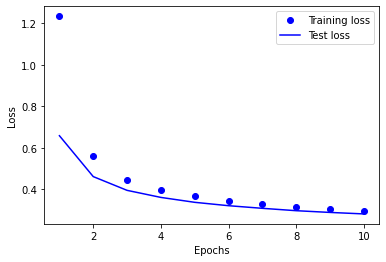

In [16]:
plt.plot(epochs,loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

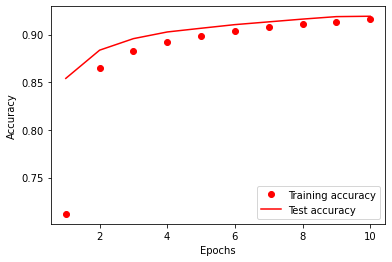

In [18]:
plt.plot(epochs,acc, 'ro', label='Training accuracy')
plt.plot(epochs,val_acc, 'r', label='Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()